# Predicting English Premier Division 2020 Players Rating with Regression

This dataset contains a collection of players (no newgen) and their attributes, such as age, position, club, nationality, value, wage, all player attribute components, etc.

Here, we will try to predict the players' current ability based on their attributes with Regression

### Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

In [67]:
df = pd.read_csv('englishpremierdivision2020.csv')
df.head()

,Unnamed: 0,name,position,club,division,based,nation,age,preferredfoot,preferredfootsimple,...,weight,cmd,com,ecc,han,kic,pun,ref,thr,tro
0,6,Kevin De Bruyne,"M (RLC), AM (C)",Man City,English Premier Division,England (Premier Division),BEL,27,Either,Either,...,70,2,2,2,2,3,1,3,3,2
1,9,Gareth Bale,"M (L), AM (RLC), ST (C)",Tottenham,English Premier Division,England (Premier Division),WAL,29,Left,Left,...,82,2,3,2,2,2,3,1,1,3
2,12,Harry Kane,"AM (C), ST (C)",Tottenham,English Premier Division,England (Premier Division),ENG,25,Either,Either,...,86,1,2,1,3,2,3,3,3,2
3,14,Mohamed Salah,"AM (RL), ST (C)",Liverpool,English Premier Division,England (Premier Division),EGY,27,Left,Left,...,72,2,1,1,1,3,4,3,1,2
4,16,Sadio ManÃ©,"AM (RL), ST (C)",Liverpool,English Premier Division,England (Premier Division),SEN,27,Right,Right,...,69,2,2,3,3,1,3,1,3,1


#### Column Description

Profile
* Name: Name of player
* Position: All possible position of Player
* Club: Club of player
* Division: Division of player's club
* Based: Nation Based of player
* Nation: Nationality of player
* Age: Age of player
* Preferred Foot: Preferred Foot of player
* Best Pos: Best position of player
* Best Role: Best role of player in position
* Value: Current value of player (in euro)
* Wage: Wage of player in club (in euro, per week)
* CA: Current Ability of player (hidden attribute in FM20)
* PA: Potential Ability of player (hidden attribute in FM20)

Mental Attributes
* Wor: Work Rate; Player's willingness to work to his full capacity
* Vis: Vision; Player's ability to see a potential opening and spot an opportunity another player may not have seen
* Tea: Teamwork; Player can follow tactical instructions whilst working for and alongside his team-mates
* Pos: Positioning; Player's ability to read a defensive situation and position themselves accordingly
* OtB: Off the Ball; Player's ability to move when not in possession of the ball, making themselves available to receive a pass in dangerous position
* Ldr: Leadership; Player's ability to influence player around them on the pitch
* Fla: Flair; Player's natural talent for the creative and unpredictable
* Det: Determination; Player's commitment to succeed and do his very best on and off the pitch
* Dec: Decision; Player's ability to make the correct choice both with and without the ball
* Cnt: Concentration; Player's mental focus and attention to detail on a event a event basis
* Cmp: Composure; Player's steadiness of mind and ability to make intelligent decisions with and without the ball
* Bra: Bravery; How committed player is, often putting themselves into risky situations which may cause injury
* Ant: Anticipation; Player's ability to predict and react to events going on around them
* Agg: Aggression; Player willingness to get stuck in, perharps at expense of giving away more fouls

Technical Attributes
* Tec: Technique; The aesthetic quality of a player's technical game
* Tck: Tackling; Player's ability to win the ball cleanly without conceding foul in such situations
* Pen: Penalty Taking; Player;s ability from the penalty spot
* Pas: Passing; Player's ability to successfully find a team-mate with the ball
* Mar: Marking; Player's ability to stick close to his direct opposition in defensive situations
* L Th: Long Throws; Player's ability to throw the balllong, often in attacking situations
* Lon: Long Shots; Player's prowess when shooting from outsine penalty area
* Hea: Heading; Player's ability to head the ball
* Fre: Freekick Taking; Player's ability to strike a dead ball, either when having a shot or putting the ball into dangerous areas from deep or out wide
* Fir: First Touch; Player's ability to control the ball immediately as it is passed into feet
* Fin: Finishing; Player's ability to putt the ball in the back of the net when presented with a chance
* Dri: Dribbling; Player's ability to run with the ball and manipulate it under close control
* Cro: Crossing; Player's ability to cross the ball accurately from wide areas
* Cor: Corner; Player's ability to accurately take a corner

Physical Attributes
* Str: Strength; Player;s ability to exert his physical force on an opponent to his benefit
* Sta: Stamina; Player;s ability to endure high-level physical activity for extended periods of time
* Pac: Pace; Player's top speed both on and off the ball
* Nat: Natural Fitness; How well a player stays fit when injured or not in training
* Jum: Jumping Reach; The highest point that a player can reach with his head
* Bal: Balance; How well a player can stay on his feet, both on and off the ball
* Agi: Agility; How well player can start, stop and move in different directions at varying levels of speed both on and off the ball
* Aer: Aerial Reach; Player's physical ability to challange in aerial situations
* Acc: Acceleration; How quickly a player can get to top of speed from standing start
* Height: Height of player (in cm)
* Weight: Weight of player (in kg)

Goalkeeping Attributes
* 1v1: One on Ones; Goalkeeper's ability to do well when faced with an opponent in a one on one situtation
* Thr: Throwing; Goalkeeper's ability to accurately distribute the ball from his hands
* TRO: Rushing Out (Tendency); Goalkeeper's tendency to come off his line toreact to through ball and crosses
* Ref: Reflexes; Goalkeeper's ability to react to unpredictable events with a high success rate
* Pun: Punching; Goalkeeper's inclination to punch the ball clear in situations where he could perharps attempt to catch the ball
* Kic: Kicking; The distance goalkeeper can reach with a kick both from his hands and on the ground
* Han: Handling; Goalkeeper's ability to hold onto the ball when making a save
* Ecc: Eccentricity; Goalkeeper's tendency to do the unexpected with or without the ball
* Com: Communication; Goalkeeper's ability to communicate with his defensive line and organise the defensive side of the team
* Cmd: Command of Area; Goalkeeper's ability to instinctively take charge of his penalty area by coming crosses and commanding his defensive line


### General Information and Missing Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 66 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1099 non-null   int64 
 1   name                 1099 non-null   object
 2   position             1099 non-null   object
 3   club                 1099 non-null   object
 4   division             1099 non-null   object
 5   based                1099 non-null   object
 6   nation               1099 non-null   object
 7   age                  1099 non-null   int64 
 8   preferredfoot        1099 non-null   object
 9   preferredfootsimple  1099 non-null   object
 10  bestpos              1099 non-null   object
 11  bestpossimple        1099 non-null   object
 12  bestrole             1099 non-null   object
 13  value                1099 non-null   int64 
 14  wage                 1099 non-null   int64 
 15  ca                   1099 non-null   int64 
 16  pa    

#### Observation:

* There are 1099 rows and 66 columns in dataset
* There is one unused column, probably index column for previous dataset format. We need to drop this column!
* Surprisingly there is no null data!
* Each column has been in a proper data type
* We need to check duplicated values

In [68]:
#drop first column
df = df.drop(columns = df.columns[0])

In [69]:
#drop preferredfoot and bestpos column
df = df.drop(columns = ['preferredfoot', 'bestpos'])

In [70]:
#check duplicated data
df.duplicated().sum()

0

### Statistical Summary 

In [71]:
#collect columns based on data type
categorical = []
numerical = []
for column in df.columns:
    if df[column].dtypes == 'int64':
        numerical.append(column)
    else:
        categorical.append(column)

print('categorical = ', categorical, '\n', 'numerical = ', numerical)

categorical =  ['name', 'position', 'club', 'division', 'based', 'nation', 'preferredfootsimple', 'bestpossimple', 'bestrole'] 
 numerical =  ['age', 'value', 'wage', 'ca', 'pa', '1v1', 'cor', 'cro', 'dri', 'fin', 'fir', 'fre', 'hea', 'lon', 'lth', 'mar', 'pas', 'pen', 'tck', 'tec', 'agg', 'ant', 'bra', 'cmp', 'cnt', 'dec', 'det', 'fla', 'ldr', 'otb', 'pos', 'tea', 'vis', 'wor', 'acc', 'aer', 'agi', 'bal', 'height', 'jum', 'nat', 'pac', 'sta', 'str', 'weight', 'cmd', 'com', 'ecc', 'han', 'kic', 'pun', 'ref', 'thr', 'tro']


In [8]:
df[numerical].describe()

,age,value,wage,ca,pa,1v1,cor,cro,dri,fin,...,weight,cmd,com,ecc,han,kic,pun,ref,thr,tro
count,1099.000000,1.099000e+03,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,...,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000
mean,20.626024,8.266255e+06,27472.697907,96.234759,127.052775,3.151046,6.600546,7.513194,8.601456,7.382166,...,72.040036,3.100091,3.014559,2.575978,3.296633,3.253867,3.076433,3.444040,3.016379,3.146497
std,5.013579,1.405139e+07,48409.668609,38.380933,27.063087,3.129117,3.375908,4.147394,4.528943,4.143981,...,8.544123,3.001668,2.784580,2.122480,3.570433,3.202369,2.941070,3.815569,2.764876,3.169098
min,14.000000,0.000000e+00,0.000000,30.000000,54.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,16.000000,2.150000e+04,120.000000,60.000000,107.000000,1.000000,4.000000,4.000000,5.000000,4.000000,...,66.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,18.000000,1.350000e+05,1500.000000,86.000000,130.000000,2.000000,6.000000,8.000000,9.000000,7.000000,...,72.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,24.500000,1.350000e+07,40000.000000,132.000000,148.000000,3.000000,9.000000,11.000000,12.000000,11.000000,...,78.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,37.000000,8.800000e+07,525000.000000,188.000000,188.000000,17.000000,17.000000,19.000000,19.000000,19.000000,...,100.000000,17.000000,16.000000,20.000000,18.000000,20.000000,19.000000,20.000000,17.000000,18.000000


#### Observation:

* There is no odd values based on range of each column
* almost all numerical columns range from 1 to 20, except height, weight, age, value, wage, ca and pa

In [9]:
df[categorical].describe()

,name,position,club,division,based,nation,preferredfootsimple,bestpossimple,bestrole
count,1099,1099,1099,1099,1099,1099,1099,1099,1099
unique,1097,125,32,1,1,72,3,7,36
top,Ben Davies,GK,Liverpool,English Premier Division,England (Premier Division),ENG,Right,D,CD
freq,2,138,65,1099,1099,593,808,339,105


#### Observation:

* Look like there are two duplicated names we have to check
* Liverpool has the most players with 65 different players
* The most players' nationality is England with 593 players which is reasonable since it is their own division
* Most players are right footed
* D or Defender is the most stacked position in the division with 339 players have their best ability to play this
* CD or Central Defender is the most stacked role in the division with 105 players have their best ability to play this

In [10]:
df[df['name'].duplicated(keep=False)]

,name,position,club,division,based,nation,age,preferredfootsimple,bestpossimple,bestrole,...,weight,cmd,com,ecc,han,kic,pun,ref,thr,tro
311,Ben Davies,D/WB (L),Tottenham,English Premier Division,England (Premier Division),WAL,26,Left,D,WB,...,76,1,3,1,1,3,3,2,1,2
389,Ben Davies,D (C),Liverpool,English Premier Division,England (Premier Division),ENG,23,Left,D,BPD,...,75,3,3,3,3,2,3,2,3,2
428,Isak Hansen-AarÃ¸en,M/AM (C),Man Utd,English Premier Division,England (Premier Division),NOR,14,Right,AM,AP,...,55,3,3,3,2,2,3,3,3,2
452,Isak Hansen-AarÃ¸en,M/AM (C),Man Utd,English Premier Division,England (Premier Division),NOR,14,Right,AM,SS,...,60,2,1,1,2,2,2,4,3,2


#### Observation:

* There are two different players named Ben Davies, playing for two different clubs. We consider both as unique
* There are two different rows named Isak Hansen, which turns out to be duplicate based on club, nation, and age. We need to drop this

In [72]:
#drop duplicates
df = df.drop(df.index[452])

### Value Counts for Categorical Columns

In [12]:
categorical2 = ['nation', 'preferredfootsimple', 'bestpossimple', 'bestrole']

for i in range(len(categorical2)):
    print(f'Value Counts for {categorical2[i]} column \n', df[categorical2[i]].value_counts(), '\n')

Value Counts for nation column 
 ENG    593
IRL     44
FRA     43
ESP     37
SCO     33
      ... 
MEX      1
BIH      1
EST      1
GRE      1
LBR      1
Name: nation, Length: 72, dtype: int64 

Value Counts for preferredfootsimple column 
 Right     807
Left      248
Either     43
Name: preferredfootsimple, dtype: int64 

Value Counts for bestpossimple column 
 D     339
AM    216
M     215
GK    138
ST    135
DM     48
WB      7
Name: bestpossimple, dtype: int64 

Value Counts for bestrole column 
 CD     105
W      102
FB      96
SK      81
IW      81
WB      68
CM      66
G       57
BPD     46
AP      46
DLP     41
P       41
AF      39
PF      34
MEZ     31
BWM     30
BBM     23
NCB     20
AM      16
SS      14
TM      11
CAR      8
DLF      6
CWB      5
IF       5
VOL      4
NFB      4
DW       4
CF       3
HB       2
DM       2
A        2
IWB      2
WP       1
F9       1
RGA      1
Name: bestrole, dtype: int64 



### Data Preprocessing

In [73]:
#collect columns based on atribute categories
profile = ['name', 'position', 'club', 'division', 'based', 'nation', 'age', 'preferredfootsimple', 
           'bestpossimple', 'bestrole', 'value', 'wage', 'ca', 'pa']
mental = ['wor', 'vis', 'tea', 'pos', 'otb', 'ldr', 'fla', 'det', 'dec', 'cnt', 'cmp', 'bra', 'ant', 'agg']
technical = ['tec', 'tck', 'pen', 'pas', 'mar', 'lth', 'lon', 'hea', 'fre', 'fir', 'fin', 'dri', 'cro', 'cor']
physical = ['str', 'sta', 'pac', 'nat', 'jum', 'bal', 'agi', 'aer', 'acc', 'height', 'weight']
goalkeeping = ['thr', 'tro', 'ref', 'pun', 'kic', 'han', 'ecc', 'com', 'cmd', '1v1']

mental = sorted(mental)
technical = sorted(technical)
physical = sorted(physical)
goalkeeping = sorted(goalkeeping)

In [74]:
#reorder columns based on attributes
order = profile + technical + mental + physical + goalkeeping
df = df[order]
df.head()

,name,position,club,division,based,nation,age,preferredfootsimple,bestpossimple,bestrole,...,1v1,cmd,com,ecc,han,kic,pun,ref,thr,tro
0,Kevin De Bruyne,"M (RLC), AM (C)",Man City,English Premier Division,England (Premier Division),BEL,27,Either,M,MEZ,...,2,2,2,2,2,3,1,3,3,2
1,Gareth Bale,"M (L), AM (RLC), ST (C)",Tottenham,English Premier Division,England (Premier Division),WAL,29,Left,AM,W,...,1,2,3,2,2,2,3,1,1,3
2,Harry Kane,"AM (C), ST (C)",Tottenham,English Premier Division,England (Premier Division),ENG,25,Either,ST,DLF,...,2,1,2,1,3,2,3,3,3,2
3,Mohamed Salah,"AM (RL), ST (C)",Liverpool,English Premier Division,England (Premier Division),EGY,27,Left,AM,IF,...,3,2,1,1,1,3,4,3,1,2
4,Sadio ManÃ©,"AM (RL), ST (C)",Liverpool,English Premier Division,England (Premier Division),SEN,27,Right,AM,IF,...,4,2,2,3,3,1,3,1,3,1


In [15]:
#check the last updated columns and orders
df.columns

Index(['name', 'position', 'club', 'division', 'based', 'nation', 'age',
       'preferredfootsimple', 'bestpossimple', 'bestrole', 'value', 'wage',
       'ca', 'pa', '1v1', 'cor', 'cro', 'dri', 'fin', 'fir', 'fre', 'hea',
       'lon', 'lth', 'mar', 'pas', 'pen', 'tck', 'tec', 'agg', 'ant', 'bra',
       'cmp', 'cnt', 'dec', 'det', 'fla', 'ldr', 'otb', 'pos', 'tea', 'vis',
       'wor', 'acc', 'aer', 'agi', 'bal', 'height', 'jum', 'nat', 'pac', 'sta',
       'str', 'weight', 'cmd', 'com', 'ecc', 'han', 'kic', 'pun', 'ref', 'thr',
       'tro'],
      dtype='object')

#### Notes:

For this project, we will only use profile and technical attributes with value as target. We need to drop other column.

In [75]:
#create project dataset
projectcolumn = technical + mental + physical + goalkeeping + ['ca']
projectdata = df[projectcolumn]
projectdata.head()

,cor,cro,dri,fin,fir,fre,hea,lon,lth,mar,...,cmd,com,ecc,han,kic,pun,ref,thr,tro,ca
0,15,19,15,16,16,15,6,16,8,7,...,2,2,2,2,3,1,3,3,2,188
1,14,16,16,17,14,17,18,19,15,6,...,2,3,2,2,2,3,1,1,3,173
2,9,16,13,19,14,12,15,16,6,10,...,1,2,1,3,2,3,3,3,2,183
3,14,14,16,18,15,13,10,13,4,8,...,2,1,1,1,3,4,3,1,2,179
4,7,14,16,17,17,7,13,13,3,11,...,2,2,3,3,1,3,1,3,1,179


In [29]:
#one hot encoding for bestpossimple column
projectdata = pd.get_dummies(projectdata, columns=['bestpossimple'], prefix='pos')
projectdata

,1v1,cor,cro,dri,fin,fir,fre,hea,lon,lth,...,wage,ca,pa,pos_AM,pos_D,pos_DM,pos_GK,pos_M,pos_ST,pos_WB
0,2,15,19,15,16,16,15,6,16,8,...,230000,188,188,0,0,0,0,1,0,0
1,1,14,16,16,17,14,17,18,19,15,...,525000,173,186,1,0,0,0,0,0,0
2,2,9,16,13,19,14,12,15,16,6,...,200000,183,185,0,0,0,0,0,1,0
3,3,14,14,16,18,15,13,10,13,4,...,200000,179,184,1,0,0,0,0,0,0
4,4,7,14,16,17,17,7,13,13,3,...,180000,179,184,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,1,5,10,1,4,8,5,9,3,5,...,350,47,60,0,1,0,0,0,0,0
1095,2,2,2,6,5,4,1,12,3,5,...,120,40,59,0,1,0,0,0,0,0
1096,6,6,3,3,3,1,8,1,1,1,...,120,48,57,0,0,0,1,0,0,0
1097,8,3,2,3,3,1,7,1,3,3,...,120,52,56,0,0,0,1,0,0,0


### Split Data: Train - Validation - Test

In [76]:
#split train-validation-test
from sklearn.model_selection import train_test_split

feature = projectdata.drop(columns='ca')
target = projectdata[['ca']]

#split data to pretrain-test
feature_df_pretrain, feature_df_test, target_df_pretrain, target_df_test = train_test_split(feature, target, test_size = 0.20, random_state = 123)

#split pretrain data to train and validation
feature_df_train, feature_df_validation, target_df_train, target_df_validation = train_test_split(feature_df_pretrain, target_df_pretrain, test_size = 0.20, random_state = 123)

### Feature Selection

In [77]:
#check multicollinearity
#calculate vif score for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i) for i in range(X.shape[1])], index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,cor,4.065250
2,cro,5.298715
3,dri,7.130088
4,fin,5.081061
5,fir,5.138866
6,fre,4.142674
7,hea,3.970698
8,lon,4.506360
9,lth,2.173490
10,mar,6.122692


#### Observation:

There are several columns that have moderate multicollinearity (with vif score >= 4):

1v1, cro, dri, fin, fir, lon, mar, tck, tec, ca, pa

We must look carefully to the following correlation plot

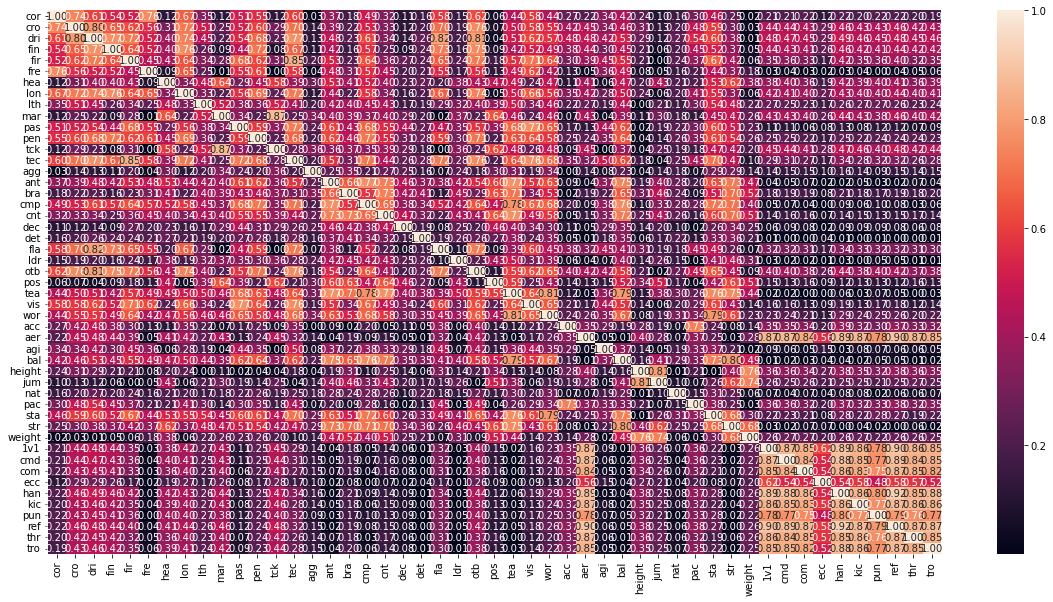

In [78]:
#draw a correlation heatmap
df_train = pd.concat([feature_df_train, target_df_train], axis=1)
corr = feature_df_train.corr().abs()

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [79]:
#select the upper triangular matrix
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
print(upper_tri)

        cor       cro       dri       fin       fir       fre       hea  \
cor     NaN  0.743579  0.608581  0.538707  0.517622  0.759490  0.121741   
cro     NaN       NaN  0.802117  0.654248  0.623486  0.555921  0.306764   
dri     NaN       NaN       NaN  0.771786  0.723759  0.523358  0.395850   
fin     NaN       NaN       NaN       NaN  0.637481  0.518776  0.399868   
fir     NaN       NaN       NaN       NaN       NaN  0.454652  0.425195   
fre     NaN       NaN       NaN       NaN       NaN       NaN  0.090783   
hea     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
lon     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
lth     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
mar     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
pas     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
pen     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
tck     NaN       NaN    

C:\Users\user\AppData\Local\Temp\ipykernel_8252\3042810502.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))


In [80]:
#drop the column with high correlation
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
print(to_drop)

feature_df_train = feature_df_train.drop(columns=to_drop)
feature_df_validation = feature_df_validation.drop(columns=to_drop)
feature_df_test = feature_df_test.drop(columns=to_drop)

['dri', 'tck', 'tec', 'fla', 'otb', 'wor', 'jum', 'str', '1v1', 'cmd', 'com', 'han', 'kic', 'pun', 'ref', 'thr', 'tro']


In [81]:
#recalculate vif score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i) for i in range(X.shape[1])], index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,cor,3.960769
2,cro,4.270216
3,fin,4.378141
4,fir,3.851610
5,fre,4.031712
6,hea,3.457461
7,lon,4.245973
8,lth,2.014332
9,mar,4.072408
10,pas,3.618977


#### Observation:

There is no more column with moderate to high vif score

## Model Training (Ridge Regression)

### Train Multiple Models

In [82]:
#Ridge
#Train data using different alpha

from sklearn.linear_model import Ridge

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=123)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=123)
ridge_reg_one = Ridge(alpha=1, random_state=123)
ridge_reg_ten = Ridge(alpha=10, random_state=123)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_df_train, y_df_train)
ridge_reg_pointone.fit(X_df_train, y_df_train)
ridge_reg_one.fit(X_df_train, y_df_train)
ridge_reg_ten.fit(X_df_train, y_df_train)

Ridge(alpha=10, random_state=123)

### Find the Best Model on Validation Set (based on RMSE score)

In [83]:
#find the best alpha using validation dataset
from sklearn.metrics import mean_squared_error

X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 7.895619599364738
RMSE of Ridge regression model with alpha = 0.1 is 7.89561171543273
RMSE of Ridge regression model with alpha = 1.0 is 7.89553319299443
RMSE of Ridge regression model with alpha = 10 is 7.894779396927543


#### Observation:

The lowest RMSE is scored by alpha = 10, so we will use for the following model evaluation.

### Model Evaluation

In [84]:
#evaluate the model
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df.sort_values('coefficient')

,feature,coefficient
0,intercept,-102.314563
9,mar,-0.389556
7,lon,-0.025463
27,height,-0.014648
12,agg,0.060924
1,cor,0.081892
22,vis,0.177523
8,lth,0.178371
21,tea,0.190840
28,nat,0.208011


In [85]:
#regression line formula

formula ='ca (rating) = '

for i in range(len(coef_df['coefficient'])):
    if coef_df['feature'][i] == 'intercept':
        formula += str(coef_df['coefficient'][i])
    else:
        formula += ' + ' + str(coef_df['coefficient'][i]) + '(' + coef_df['feature'][i] + ')'

print(formula)
#str(coef_df['coefficient'][0]) + '(' + coef_df['feature'][0] + ')'

ca (rating) = -102.31456328090721 + 0.08189166923781005(cor) + 0.8582025640130365(cro) + 0.639948800407591(fin) + 0.6387946310864946(fir) + 0.6554779529366063(fre) + 0.555875307229341(hea) + -0.025463326822127985(lon) + 0.17837111767262942(lth) + -0.3895555921549859(mar) + 0.6349249981387419(pas) + 0.23060042634282588(pen) + 0.06092368206637953(agg) + 1.3562548086497412(ant) + 0.7965953813354973(bra) + 0.9571225804553275(cmp) + 0.6542216281556392(cnt) + 1.6084973629369779(dec) + 0.273816606467522(det) + 0.26582047672945436(ldr) + 0.94518457171044(pos) + 0.19083965889619675(tea) + 0.17752312752032018(vis) + 1.1203751578902308(acc) + 1.5983553249853504(aer) + 1.506483077466963(agi) + 0.6103790198913311(bal) + -0.01464766155086181(height) + 0.20801050747314193(nat) + 1.6181620626059032(pac) + 0.7661205149967738(sta) + 0.29601472473791707(weight) + 0.2750189509564284(ecc)


#### Interpretation:

* A null point in all features is associated with a decrease of -112.4 in player's ability rating. 
* An increase of 1 point in pac (pace), while the other features are kept fixed, is associated with an increase of 1.62 in player's ability ranking.
* An increase of 1 point in cmp (composure), while the other features are kept fixed, is associated with an increase of 0.96 in player's ability ranking.
* The features that have high coefficient are: acc (acceleration), ant (anticipation), agi (agility), aer (aerial reach), dec (decision making), and pac (pace). They are considered as the most relevant features to determine players' ability rating.

### Diagnostic Study

R-squared for training data is 0.9558798754332634


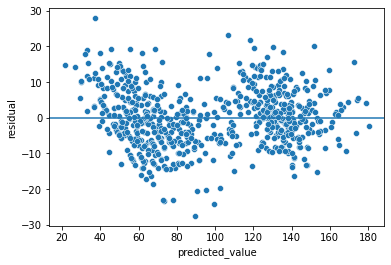

In [86]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_df_train)
print('R-squared for training data is {}'.format(r2_score(y_df_train, y_predict_train)))

# calculate residuals
residual = y_df_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

#### Observation:

based on the residual plot, the dataset:
* have linear relationship 
* no constant variance
* have independent observations

### Training Error

In [87]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_df_train)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('R-squared for training data is {}'.format(r2_score(y_df_train, y_predict_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_df_train, y_predict_train))))
print('Normalized RMSE for traning data is {}'.format(np.sqrt(mean_squared_error(y_df_train, y_predict_train))/(max(y_df_train)-min(y_df_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_df_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_df_train, y_predict_train)))

R-squared for training data is 0.9558798754332634
RMSE for training data is 8.084749869529382
Normalized RMSE for traning data is 0.05284150241522472
MAE for training data is 6.38072485493704
MAPE for training data is 0.08273972425243087


#### Observation:

* RMSE score is 8.08. Considering players' ability rating varies between 0-200, which results in 5.2% (normalized). It considered as low RMSE score and show the regression model able to predict the value well.
* The low score of RMSE is also associated with low score on MAE and MAPE.
* The model could predict 95.5% real players' ability rating accurately.

### Testing Error

In [88]:
# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test = ridge_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('R-squared for testing data is {}'.format(r2_score(y_df_test, y_predict_test)))
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))))
print('Normalized RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))/(max(y_df_test)-min(y_df_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_df_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_df_test, y_predict_test)))

R-squared for testing data is 0.9580586731929029
RMSE for testing data is 7.762389730654959
Normalized RMSE for testing data is 0.05584453043636661
MAE for testing data is 6.222679341404855
MAPE for testing data is 0.0791997151217391


#### Observation:

* RMSE score is 7.76. Considering players' ability rating varies between 0-200, which results in 5.5% (normalized). It considered as low RMSE score and show the regression model able to predict the value well.
* The low score of RMSE is also associated with low score on MAE and MAPE.
* The model could predict 95.8% real players' ability rating accurately.
*The training model has been succesfully fitted the testing data very well considering the low amount of rmse and pretty similar figure on every evaluation score.